<a href="https://colab.research.google.com/github/atalaydenknalbant/DBDA.X425_Assignments/blob/main/assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


## Load cifar10 dataset into training and testing variables


In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print('train dataset shape', x_train.shape,y_train.shape)
print('test dataset shape', x_test.shape,y_test.shape)

train dataset shape (50000, 32, 32, 3) (50000, 1)
test dataset shape (10000, 32, 32, 3) (10000, 1)


## Normalize Data

In [3]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

## Create Sequantial Model

In [4]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect()

# instantiate a distribution strategy
tpu_strategy = tf.distribute.TPUStrategy(tpu)

with tpu_strategy.scope():
  model = keras.Sequential([
        keras.Input(shape=(32,32,3)) ,
        layers.Conv2D(32,[3,3],padding='same',activation='relu', 
                      kernel_regularizer=regularizers.l2(0.01)),  
        layers.BatchNormalization() ,
        layers.Conv2D(32,[3,3],padding='same',activation='relu', 
                      kernel_regularizer=regularizers.l2(0.01)),  
        layers.BatchNormalization() ,    
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.2),
        layers.Conv2D(64,[3,3],padding='same',activation='relu',
                      kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization() , 
        layers.Conv2D(64,[3,3],padding='same',activation='relu',
                      kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization() ,         
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.3),
        layers.Conv2D(128,[3,3],padding='same',activation='relu',
                      kernel_regularizer=regularizers.l2(0.01)),            
        layers.BatchNormalization()   ,  
        layers.Conv2D(128,[3,3],padding='same',activation='relu',
                      kernel_regularizer=regularizers.l2(0.01)),            
        layers.BatchNormalization()   ,         
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Dropout(0.4),
        layers.Flatten(),
        layers.Dense(64,activation='relu',
                     kernel_regularizer=regularizers.l2(0.01)),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
  ]
        )
  model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=['accuracy']
)
  model.summary()

INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.84.190.74:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.84.190.74:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

## Train Model

In [5]:
model.fit(x_train,y_train,batch_size=64,epochs=100,verbose=2)

Epoch 1/100
782/782 - 16s - loss: 4.8882 - accuracy: 0.3646
Epoch 2/100
782/782 - 4s - loss: 2.3294 - accuracy: 0.5156
Epoch 3/100
782/782 - 4s - loss: 1.8496 - accuracy: 0.5811
Epoch 4/100
782/782 - 4s - loss: 1.8336 - accuracy: 0.5962
Epoch 5/100
782/782 - 4s - loss: 1.8255 - accuracy: 0.6071
Epoch 6/100
782/782 - 4s - loss: 1.8424 - accuracy: 0.6137
Epoch 7/100
782/782 - 4s - loss: 1.8383 - accuracy: 0.6160
Epoch 8/100
782/782 - 4s - loss: 1.8042 - accuracy: 0.6228
Epoch 9/100
782/782 - 4s - loss: 1.8354 - accuracy: 0.6256
Epoch 10/100
782/782 - 4s - loss: 1.8352 - accuracy: 0.6234
Epoch 11/100
782/782 - 4s - loss: 1.8299 - accuracy: 0.6246
Epoch 12/100
782/782 - 4s - loss: 1.7649 - accuracy: 0.6336
Epoch 13/100
782/782 - 4s - loss: 1.7548 - accuracy: 0.6359
Epoch 14/100
782/782 - 4s - loss: 1.7609 - accuracy: 0.6404
Epoch 15/100
782/782 - 4s - loss: 1.7365 - accuracy: 0.6401
Epoch 16/100
782/782 - 4s - loss: 1.7176 - accuracy: 0.6403
Epoch 17/100
782/782 - 4s - loss: 1.7537 - accur

## Evaluate Model

In [6]:
model.evaluate(x_test,y_test,verbose=2)

313/313 - 5s - loss: 1.2606 - accuracy: 0.7215


[1.2605576515197754, 0.7214999794960022]

## Predict Images

In [7]:
y_pred = model.predict(x_test)
y_pred[:10]

array([[6.19604578e-03, 4.92187636e-03, 1.40835959e-02, 4.49109823e-01,
        3.58094531e-03, 9.12083909e-02, 7.32231513e-02, 8.25930852e-03,
        3.45501930e-01, 3.91495880e-03],
       [1.16081005e-02, 6.37885854e-02, 2.37065688e-04, 6.02379267e-04,
        2.33724029e-04, 6.07119800e-05, 1.52798340e-04, 1.13081958e-04,
        9.20093596e-01, 3.11007537e-03],
       [7.06350431e-02, 5.41551299e-02, 3.32905585e-03, 2.23529059e-03,
        8.90233030e-04, 4.71083244e-04, 3.99465719e-03, 9.26780864e-04,
        8.51316512e-01, 1.20462961e-02],
       [2.83736974e-01, 7.37354234e-02, 9.30224080e-03, 3.40103568e-03,
        2.11520726e-03, 1.24830089e-03, 1.99076324e-03, 1.26928440e-03,
        6.10829949e-01, 1.23709021e-02],
       [2.79656355e-03, 4.26868163e-03, 2.00475100e-02, 2.47458313e-02,
        1.29622012e-01, 2.94832909e-03, 8.12290847e-01, 1.30300992e-03,
        1.58205512e-03, 3.95220850e-04],
       [3.09103332e-03, 9.92063805e-03, 2.22642086e-02, 1.65212959e-01,
   

In [8]:
y_test = y_test.reshape(-1,)
y_train =y_train.reshape(-1,)
print(y_test[:10])

[3 8 8 0 6 6 1 6 3 1]


In [9]:
y_pred_results = [np.argmax(x) for x in y_pred]
print(y_pred_results[:10])

[3, 8, 8, 8, 6, 6, 1, 6, 3, 1]


In [10]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [13]:
def show_image(x_train_sample, y_train_sample,index):
  plt.figure(figsize=(30,5))
  plt.imshow(x_train_sample[index])
  plt.xlabel(class_names[y_train_sample[index]])

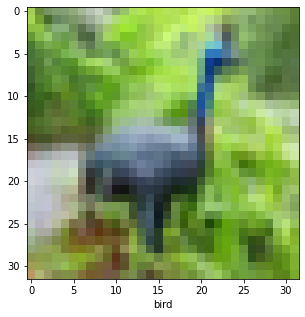

In [14]:
show_image(x_train,y_train,6)

313/313 - 2s


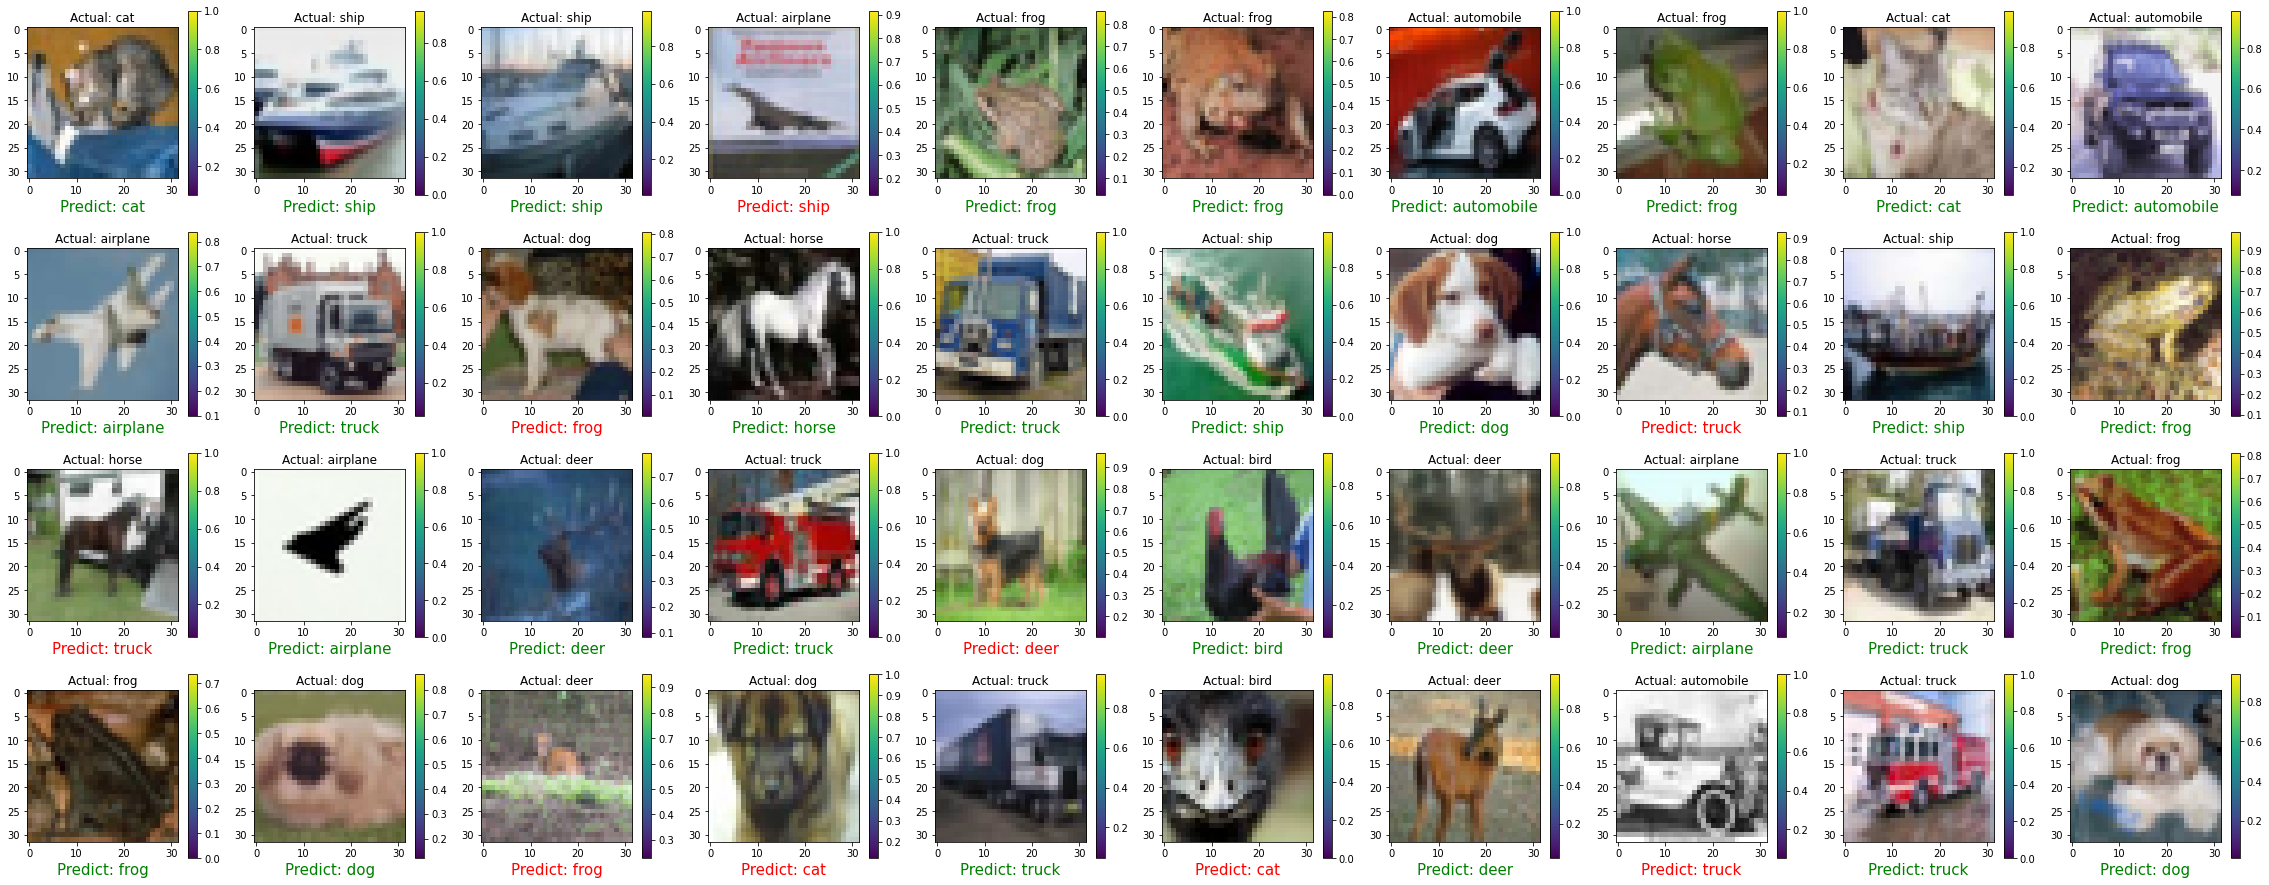

In [15]:
model.predict(x_test)
predictions = model.predict(x_test,verbose=2)
i=0

fig = plt.figure(figsize=(40, 40))
for e in zip(y_test, predictions):
  fig.add_subplot(10, 10, i+1)
  plt.imshow(x_test[i])
  plt.colorbar()
  plt.grid(False)
  color = 'green' if class_names[y_test[i]] == class_names[np.argmax(predictions[i])] else "red"
  plt.title(f"Actual: {class_names[y_test[i]]}")
  plt.xlabel(f"Predict: {class_names[np.argmax(predictions[i])]}",color=color,fontsize=15)
  i+=1
  if i == 40:
    break
